# Exploratory Data Analysis (EDA) on Animal Shelter Outcomes

This notebook is used for performing exploratory data analysis on the training dataset of animal shelter outcomes. The goal is to understand the distribution of the outcome types and other features.

<h4>Enter your computer's home firectory</h4>

In [1]:
home_dir = r"/Users/wrngnfreeman/Github/Shelter-Animal-Outcomes-by-kaggle.com"

## Import required modules

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(home_dir + r"/src")
import data_processing, utils

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

## Load Training dataset

In [3]:
# Load and process training dataset
processed_df = data_processing.process_data(
    home_dir=home_dir,
    data_file=r"train",
    AnimalID=r"AnimalID",
    dep_var=r"OutcomeType"
)

# Display the first few rows of the dataset
processed_df.head()

,AnimalID,OutcomeType,Name,DateTime,AnimalType,AgeuponOutcome,SexuponOutcome,Sterilization,BreedType,Mix,CoatColor,CoatPattern
0,A006100,Return_to_owner,Scamp,2014-12-20 16:35:00,Dog,<10 years,Male,Sterilized,Sporting,Pure breed,Yellow,NaN
1,A006100,Return_to_owner,Scamp,2014-12-20 16:35:00,Dog,<10 years,Male,Sterilized,Sporting,Pure breed,White,NaN
2,A047759,Transfer,Oreo,2014-04-07 15:12:00,Dog,<15 years,Male,Sterilized,Hound,Pure breed,Tricolor,NaN
3,A134067,Return_to_owner,Bandit,2013-11-16 11:54:00,Dog,15+ years,Male,Sterilized,Herding,Pure breed,Brown,NaN
4,A134067,Return_to_owner,Bandit,2013-11-16 11:54:00,Dog,15+ years,Male,Sterilized,Herding,Pure breed,White,NaN


## Visualizations

### OutcomeType Distribution

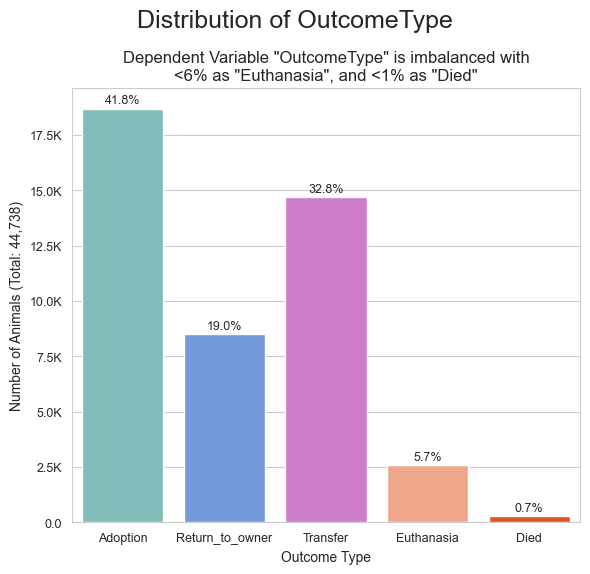

In [4]:
# Define the order and colors for OutcomeType
order = ["Adoption", "Return_to_owner", "Transfer", "Euthanasia", "Died"]
colors = ["#76C7C0", "#6495ED", "#DA70D6", "#FFA07A", "#FF4500"]
# Count the occurrences of each OutcomeType
outcome_counts = processed_df['OutcomeType'].value_counts().reindex(order, fill_value=0)
# Calculate the total number of animals
total_animals = outcome_counts.sum()
# Calculate the percentage of each OutcomeType
percentages = (outcome_counts / total_animals) * 100
# Create a custom palette dictionary
custom_palette = dict(zip(order, colors))
# Create a DataFrame from the counts for plotting
plot_df = pd.DataFrame({
    'OutcomeType': outcome_counts.index,
    'Count': outcome_counts.values
})
# Create the bar chart using the pre-calculated data
plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x='OutcomeType',
    y='Count',
    data=plot_df,
    palette=custom_palette,
    hue='OutcomeType',  # Assigning 'OutcomeType' to hue
    legend=False        # Setting legend to False as we don't need it
)
# Set the main title and subtitle
plt.suptitle('Distribution of OutcomeType', fontsize=18)
plt.title('Dependent Variable "OutcomeType" is imbalanced with\n<6% as "Euthanasia", and <1% as "Died"', fontsize=12)
# Set the labels
plt.xlabel('Outcome Type', fontsize=10)
plt.ylabel('Number of Animals (Total: {:,})'.format(total_animals), fontsize=10)
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
ax.yaxis.set_major_formatter(plt.FuncFormatter(utils.format_y_tick))  # Custom formatter for y-axis ticks
# Add percentage labels on top of each bar
for i, count in enumerate(outcome_counts.values):
    ax.text(i, count + 0.005 * max(outcome_counts), f'{percentages.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=9)
# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

### AnimalType Distribution

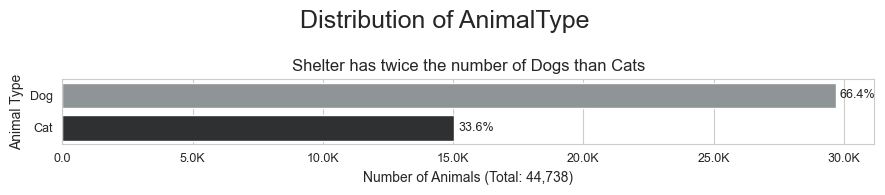

In [5]:
# Define the order and colors for AnimalType
order = ["Dog", "Cat"]
colors = ["#8E9498", "#2D3033"]
# Count the occurrences of each AnimalType
animal_counts = processed_df['AnimalType'].value_counts().reindex(order, fill_value=0)
# Calculate the total number of animals
total_animals = animal_counts.sum()
# Calculate the percentage of each AnimalType
percentages = (animal_counts / total_animals) * 100
# Create a custom palette dictionary
custom_palette = dict(zip(order, colors))
# Create a DataFrame from the counts for plotting
plot_df = pd.DataFrame({
    'AnimalType': animal_counts.index,
    'Count': animal_counts.values
})
# Create the horizontal bar chart using the pre-calculated data
plt.figure(figsize=(9, 2))
ax = sns.barplot(
    x='Count',
    y='AnimalType',
    data=plot_df,
    palette=custom_palette,
    hue='AnimalType',  # Assigning 'AnimalType' to hue
    legend=False       # Setting legend to False as we don't need it
)
# Set the main title and subtitle
plt.suptitle('Distribution of AnimalType', fontsize=18)
plt.title('Shelter has twice the number of Dogs than Cats', fontsize=12)
# Set the labels
plt.xlabel('Number of Animals (Total: {:,})'.format(total_animals), fontsize=10)
plt.ylabel('Animal Type', fontsize=10)
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
ax.xaxis.set_major_formatter(plt.FuncFormatter(utils.format_y_tick))  # Custom formatter for y-axis ticks
# Add percentage labels on the right side of each bar
for i, count in enumerate(animal_counts.values):
    ax.text(count + 0.005 * max(animal_counts), i, f'{percentages.iloc[i]:.1f}%', ha='left', va='center', fontsize=9)
# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

### AgeGroup Distribution

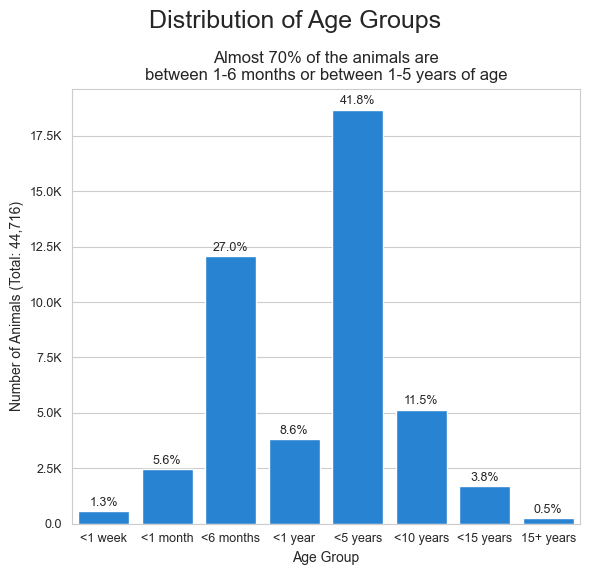

In [6]:
# Define the order and colors for AgeuponOutcome
order = ['<1 week', '<1 month', '<6 months', '<1 year', '<5 years', '<10 years', '<15 years', '15+ years']
colors = ['#0C85EE' for i in order]
# Count the occurrences of each AgeuponOutcome
outcome_counts = processed_df.loc[processed_df["AgeuponOutcome"].notna(), 'AgeuponOutcome'].value_counts().reindex(order, fill_value=0)
# Calculate the total number of animals
total_animals = outcome_counts.sum()
# Calculate the percentage of each AgeuponOutcome
percentages = (outcome_counts / total_animals) * 100
# Create a custom palette dictionary
custom_palette = dict(zip(order, colors))
# Create a DataFrame from the counts for plotting
plot_df = pd.DataFrame({
    'AgeuponOutcome': outcome_counts.index,
    'Count': outcome_counts.values
})
# Create the bar chart using the pre-calculated data
plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x='AgeuponOutcome',
    y='Count',
    data=plot_df,
    palette=custom_palette,
    hue='AgeuponOutcome',  # Assigning 'AgeuponOutcome' to hue
    legend=False           # Setting legend to False as we don't need it
)
# Set the main title and subtitle
plt.suptitle('Distribution of Age Groups', fontsize=18)
plt.title('Almost 70% of the animals are\nbetween 1-6 months or between 1-5 years of age', fontsize=12)
# Set the labels
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of Animals (Total: {:,})'.format(total_animals), fontsize=10)
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
ax.yaxis.set_major_formatter(plt.FuncFormatter(utils.format_y_tick))  # Custom formatter for y-axis ticks
# Add percentage labels on top of each bar
for i, count in enumerate(outcome_counts.values):
    ax.text(i, count + 0.005 * max(outcome_counts), f'{percentages.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=9)
# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

## Conclusion

This exploratory analysis provides insights into the distribution of outcome types, age upon outcome, and the most common breeds in the dataset. Further analysis and feature engineering will be necessary to prepare the data for modeling.